In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

1. Loading the data

In [2]:
data = pd.read_csv("Phishing_Legitimate_full.csv")
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


2. Data Conversion : Changing from 64 bit to 32 bit in order to save the memory

In [3]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

3. Summary Statistics

In [4]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. Distribution of Phishing and Non-Phishing Data

<AxesSubplot:>

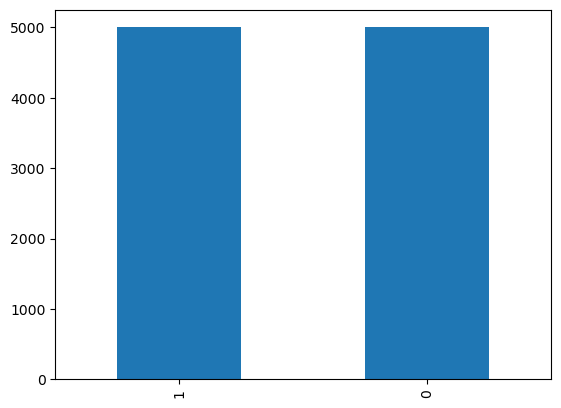

In [5]:
data['CLASS_LABEL'].value_counts().plot(kind='bar')

In this dataset, we can observe that there are equal number of phishing and non-phishing cases.

5. Mutual Information Classifier :
   It estimates mutual information between each feature and the target variable, and selects the top k features with the highest mutual information scores. 

In [6]:
X = data.drop(['id', 'CLASS_LABEL'], axis=1)
y = data['CLASS_LABEL']
discrete_features = X.dtypes == int

In [7]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      0.468183
PctExtResourceUrls                    0.294999
PctNullSelfRedirectHyperlinks         0.235555
PctExtNullSelfRedirectHyperlinksRT    0.211001
NumNumericChars                       0.133565
NumDash                               0.123664
FrequentDomainNameMismatch            0.121610
ExtMetaScriptLinkRT                   0.116475
SubmitInfoToEmail                     0.076500
NumDots                               0.062667
InsecureForms                         0.055530
PathLength                            0.053415
UrlLength                             0.047282
PathLevel                             0.046708
QueryLength                           0.046467
NumSensitiveWords                     0.039060
NumQueryComponents                    0.033943
PctExtResourceUrlsRT                  0.031603
IframeOrFrame                         0.029188
UrlLengthRT                           0.027334
HostnameLength                        0.026108
IpAddress    

6. Logistic Regression : Training data for logistic regression

In [8]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['CLASS_LABEL']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    
    arr.append([i, precision, recall, f1, accuracy])
df = pd.DataFrame(arr, columns=['num_of_features_log', 'precision_log', 'recall_log', 'f1_score_log', 'accuracy_log'])
df

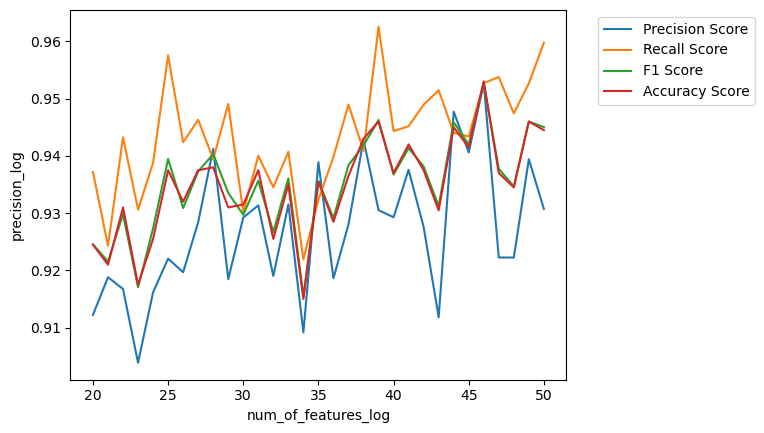

In [49]:
sns.lineplot(x='num_of_features_log', y='precision_log', data=df, label='Precision Score')
sns.lineplot(x='num_of_features_log', y='recall_log', data=df, label='Recall Score')
sns.lineplot(x='num_of_features_log', y='f1_score_log', data=df, label='F1 Score')
sns.lineplot(x='num_of_features_log', y='accuracy_log', data=df, label='Accuracy Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

7. Random Forest Classifier : 

In [41]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X1 = data[top_n_features]
    y1 = data['CLASS_LABEL']
    
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=True)
    
    rfc = RandomForestClassifier(n_estimators=500,random_state=10)
    
    rfc.fit(X1_train, y1_train)
    
    y1_pred = rfc.predict(X1_test)
    
    precision1 = precision_score(y1_test, y1_pred)
    recall1 = recall_score(y1_test, y1_pred)
    f1_1 = f1_score(y1_test, y1_pred)
    accuracy1 = accuracy_score(y1_test, y1_pred)
    
    return precision1, recall1, f1_1, accuracy1

In [71]:
arr1 = []
for i in range(20,51,1):
    precision1, recall1, f1_1, accuracy1 = train_rfc(data, i)
    arr1.append([i, precision1, recall1, f1_1, accuracy1])
    
df1 = pd.DataFrame(arr1, columns=['num_of_features_rf', 'precision_rf', 'recall_rf', 'f1_score_rf', 'accuracy_rf'])
df1.head()


,num_of_features_rf,precision_rf,recall_rf,f1_score_rf,accuracy_rf
0,20,0.974257,0.983017,0.978618,0.9785
1,21,0.978109,0.984970,0.981528,0.9815
2,22,0.982420,0.979381,0.980898,0.9815
3,23,0.985045,0.980159,0.982596,0.9825
4,24,0.978979,0.975075,0.977023,0.9770


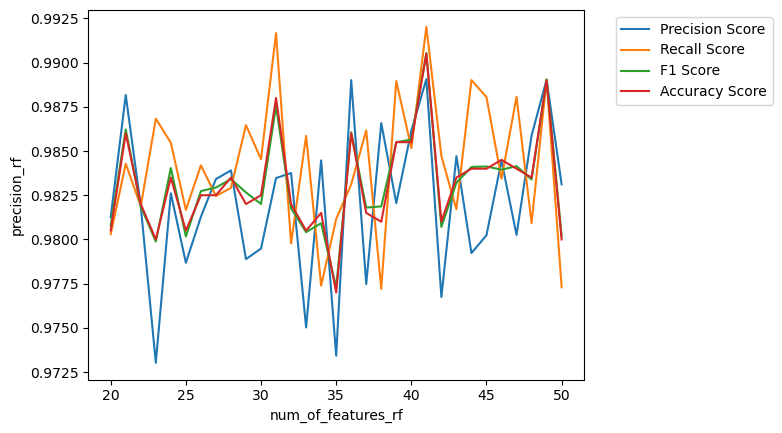

In [48]:
sns.lineplot(x='num_of_features_rf', y='precision_rf', data=df1, label='Precision Score')
sns.lineplot(x='num_of_features_rf', y='recall_rf', data=df1, label='Recall Score')
sns.lineplot(x='num_of_features_rf', y='f1_score_rf', data=df1, label='F1 Score')
sns.lineplot(x='num_of_features_rf', y='accuracy_rf', data=df1, label='Accuracy Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

8. Modelling of all the features together

In [64]:
#Modelling 

x = data.drop(columns='CLASS_LABEL',axis=1)
y = data['CLASS_LABEL']

In [65]:
#Splitting the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [68]:
#Logistic Regression:

lr = LogisticRegression(random_state=10) #creating an object

lr.fit(x_train,y_train) #fitting into logistic regression model

y_pred_lr=lr.predict(x_test) #prediction using logistic regression

print("The accuracy of logistic regression for whole model is :",accuracy_score(y_test,y_pred_lr))#finding the accuracy

import warnings
warnings.filterwarnings('ignore')


The accuracy of logistic regression for whole model is : 0.9875


In [69]:
#Random Forest Classifier

rf = RandomForestClassifier(n_estimators=20,random_state=10)

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

print("The accuracy of Random Forest Classifier for whole model is :",accuracy_score(y_test,y_pred_rf))

The accuracy of Random Forest Classifier for whole model is : 1.0
